In [20]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

n_samples = 1000

X, y = make_blobs(n_samples=n_samples, centers=6, random_state=1234)

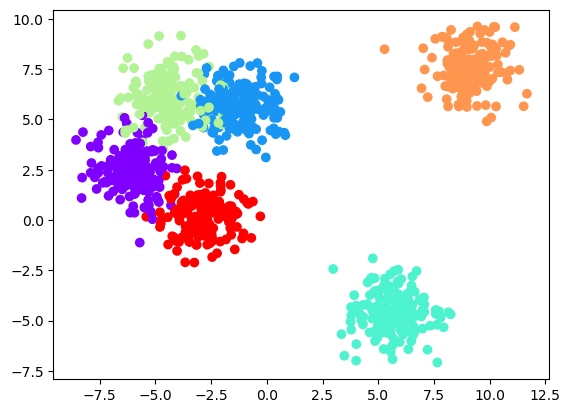

In [21]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Convert the data into tensors
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.long)
y_test = torch.from_numpy(y_test).type(torch.long)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



torch.Size([800, 2]) torch.Size([200, 2]) torch.Size([800]) torch.Size([200])


In [42]:
# Build the model
class BlobModel(nn.Module):
    def __init__(self, input_features, out_features, hidden_neurons):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_neurons),
            nn.ReLU(),
            nn.Linear(hidden_neurons, hidden_neurons),
            nn.ReLU(),
            nn.Linear(hidden_neurons, hidden_neurons),
            nn.ReLU(),
            nn.Linear(hidden_neurons, hidden_neurons),
            nn.ReLU(),
            nn.Linear(hidden_neurons, out_features)
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

In [43]:
# Instantiate the model
import torch.nn as nn
BlobModelV1 = BlobModel(input_features=2, out_features=6, hidden_neurons=32)
BlobModelV1

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=6, bias=True)
  )
)

In [44]:
# Create a loss and optimizer function
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(BlobModelV1.parameters(), lr=0.01)

In [45]:
# Create an accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [46]:
# Create device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train, X_test = X_train.to(device) , X_test.to(device)
y_train, y_test = y_train.to(device) , y_test.to(device)
BlobModelV1.to(device)

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=6, bias=True)
  )
)

In [47]:
# Create a training a testing loop

import torch
epochs = 1000

for epoch in range(epochs):
    ############# Training #############
    BlobModelV1.train()
    
    # Forward pass
    y_logits = BlobModelV1(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    # Calculate loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # Zero gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    ############# Evaluation #############
    BlobModelV1.eval()
    with torch.inference_mode():
        # Forward pass
        test_y_logits = BlobModelV1(X_train)
        test_y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        
        # Calculate loss
        test_loss = loss_fn(y_logits, y_train)
        test_acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
        
        # Print out metrics
        if epoch % 100 == 0:
            print(f"""
            Epoch: {epoch}
            Train loss: {loss:.4f}
            Train accuracy: {acc:.4f}
            Test loss: {test_loss:.4f}
            Test accuracy: {test_acc:.4f}
            Test accuracy: {test_acc:.4f}
            """)


            Epoch: 0
            Train loss: 1.7925
            Train accuracy: 16.0000
            Test loss: 1.7925
            Test accuracy: 16.0000
            Test accuracy: 16.0000
            



            Epoch: 100
            Train loss: 0.0821
            Train accuracy: 96.5000
            Test loss: 0.0821
            Test accuracy: 96.5000
            Test accuracy: 96.5000
            

            Epoch: 200
            Train loss: 0.0790
            Train accuracy: 95.5000
            Test loss: 0.0790
            Test accuracy: 95.5000
            Test accuracy: 95.5000
            

            Epoch: 300
            Train loss: 0.0741
            Train accuracy: 96.6250
            Test loss: 0.0741
            Test accuracy: 96.6250
            Test accuracy: 96.6250
            

            Epoch: 400
            Train loss: 0.0691
            Train accuracy: 97.0000
            Test loss: 0.0691
            Test accuracy: 97.0000
            Test accuracy: 97.0000
            

            Epoch: 500
            Train loss: 0.0666
            Train accuracy: 97.2500
            Test loss: 0.0666
            Test accuracy: 97.2500
            Test accuracy: 9

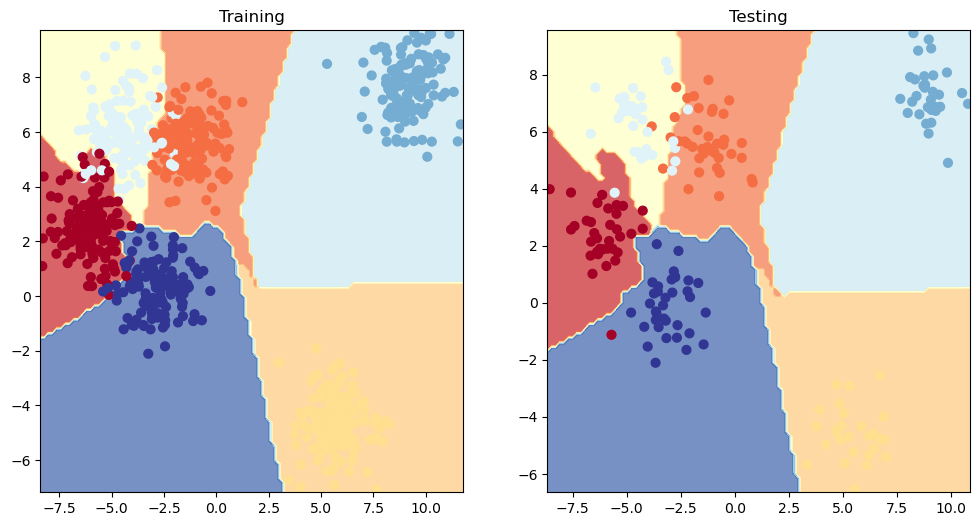

In [48]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")

plot_decision_boundary(BlobModelV1,
                X=X_train,
                y=y_train)

plt.subplot(1,2,2)

plt.title("Testing")
plot_decision_boundary(BlobModelV1,
                X=X_test,
                y=y_test)